In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sms
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA

In [61]:
df = pd.read_csv('FX_EURUSD, 1D.csv')
cols = ['time','close']
df = df[cols]

In [62]:
df = df.astype({'time':'datetime64'})
df['date'] = pd.to_datetime(df['time'],unit='s').dt.date
df['date'] = pd.to_datetime(df['date'])
df.drop('time',axis=1,inplace=True)

In [63]:
df.head()

,close,date
0,1.29268,2012-10-10
1,1.29538,2012-10-11
2,1.29490,2012-10-14
3,1.30529,2012-10-15
4,1.31188,2012-10-16


In [64]:
df.tail()

,close,date
2489,1.05600,2022-05-19
2490,1.06885,2022-05-22
2491,1.07314,2022-05-23
2492,1.06763,2022-05-24
2493,1.06980,2022-05-25


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   close   2494 non-null   float64       
 1   date    2494 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.1 KB


In [66]:
df.Timestamp = pd.to_datetime(df.date, format='%Y-%m-%d')
df.index = df.Timestamp
df = df.resample('MS').mean()

In [67]:
df.head()

,close
date,
2012-10-01,1.298384
2012-11-01,1.283300
2012-12-01,1.312261
2013-01-01,1.331939
2013-02-01,1.330745


In [68]:
df = df.asfreq(pd.infer_freq(df.index))

In [69]:
test_size = 0.3
train_samples = int((1-test_size)*len(df))
train_samples

81

In [70]:
train_data = df[:train_samples]
test_data = df[train_samples:]

In [71]:
train_data

,close
date,
2012-10-01,1.298384
2012-11-01,1.283300
2012-12-01,1.312261
2013-01-01,1.331939
2013-02-01,1.330745
...,...
2019-02-01,1.134025
2019-03-01,1.129053
2019-04-01,1.123013


In [72]:
pred_start_date = test_data.index[0]
pred_end_date=test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2019-07-01 00:00:00', freq='MS'),
 Timestamp('2022-05-01 00:00:00', freq='MS'))

In [73]:
first_diff = df.diff()[1:]

<BarContainer object of 20 artists>

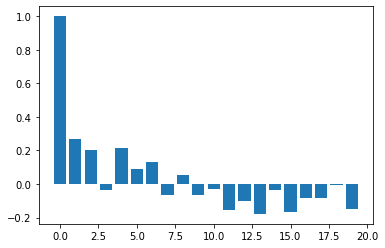

In [74]:
#ACF => Moving Average = 1
num_lags = 20
acf_vals = acf(first_diff)
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 20 artists>

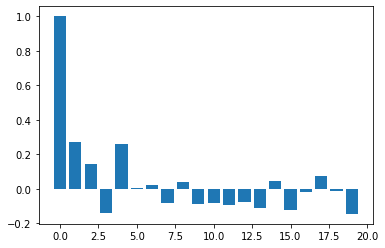

In [75]:
#PACF => Auto Regression = 1
pacf_vals = pacf(first_diff)
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [76]:
model = ARMA(train_data, order=(1,1))

In [77]:
model_fit = model.fit()

In [78]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                   81
Model:                     ARMA(1, 1)   Log Likelihood                 200.296
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 31 May 2022   AIC                           -392.592
Time:                        16:52:01   BIC                           -383.015
Sample:                    10-01-2012   HQIC                          -388.750
                         - 06-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2053      0.065     18.479      0.000       1.077       1.333
ar.L1.close     0.9699      0.023     42.671      0.000       0.925       1.014
ma.L1.close     0.1829      0.086      2.121      0.034       0.014       0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0311           +0.0000j            1.0311            0.0000
MA.1           -5.4689           +0.0000j            5.4689            0.5000
-----------------------------------------------------------------------------
"""

In [79]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [80]:
residuals = test_data['close'] - predictions

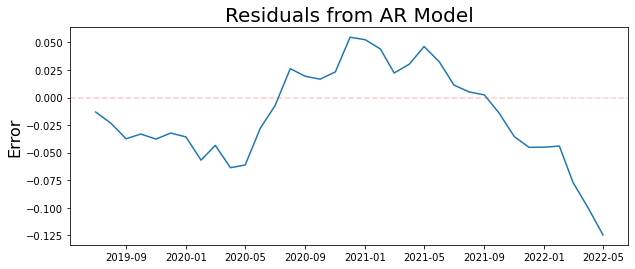

In [81]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

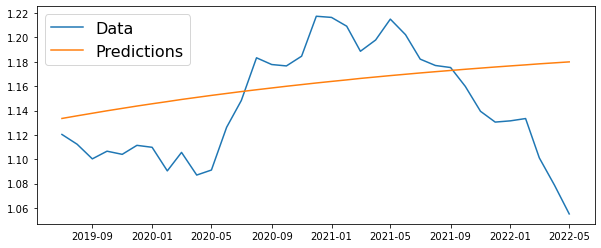

In [82]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data','Predictions'), fontsize=16)

In [83]:
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error:  0.046016796136122196


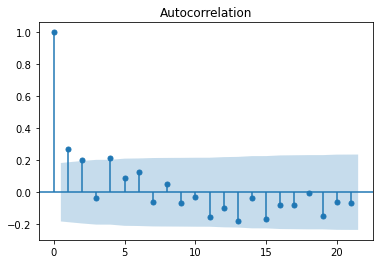

In [84]:
acf_plot = plot_acf(first_diff)

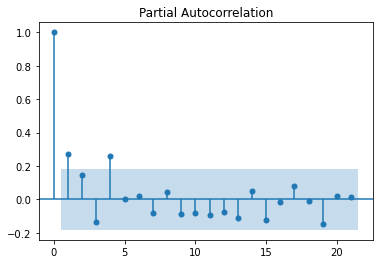

In [85]:
pacf_plot = plot_pacf(first_diff)

In [86]:
model_2 = ARMA(train_data, order=(4,1))
model_fit_2 = model_2.fit()
model_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                   81
Model:                     ARMA(4, 1)   Log Likelihood                 206.927
Method:                       css-mle   S.D. of innovations              0.018
Date:                Tue, 31 May 2022   AIC                           -399.853
Time:                        16:52:03   BIC                           -383.092
Sample:                    10-01-2012   HQIC                          -393.128
                         - 06-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2034      0.056     21.578      0.000       1.094       1.313
ar.L1.close     0.4652      0.181      2.573      0.010       0.111       0.820
ar.L2.close     0.9022      0.193      4.675      0.000       0.524       1.280
ar.L3.close    -0.4331      0.129     -3.367      0.001      -0.685      -0.181
ar.L4.close     0.0103      0.138      0.074      0.941      -0.260       0.281
ma.L1.close     0.8291      0.144      5.743      0.000       0.546       1.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0431           +0.0000j            1.0431            0.5000
AR.2            1.0559           +0.0000j            1.0559            0.0000
AR.3            2.2133           +0.0000j            2.2133            0.0000
AR.4           39.9800           +0.0000j           39.9800            0.0000
MA.1           -1.2062           +0.0000j            1.2062            0.5000
-----------------------------------------------------------------------------
"""

In [87]:
predict_ARMA_2 = model_fit_2.predict(start=pred_start_date, end=pred_end_date)
residuals_ARMA_2 = test_data['close'] - predict_ARMA_2

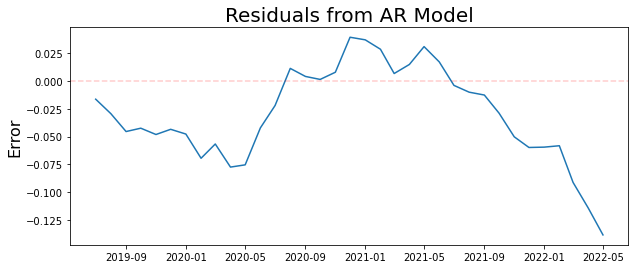

In [88]:
plt.figure(figsize=(10,4))
plt.plot(residuals_ARMA_2)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

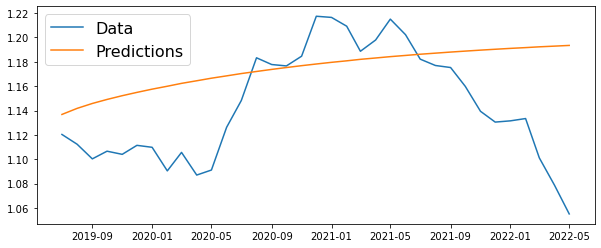

In [89]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predict_ARMA_2)
plt.legend(('Data','Predictions'), fontsize=16)

In [90]:
test_data.index

DatetimeIndex(['2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [92]:
#Rolling Forecast
#Predict 1 month in advance (one month ahead each time)
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data = df[:end_date - timedelta(days=1)]
    model_3 = ARMA(train_data, order=(1,1))
    model_fit_3 = model_3.fit()
    pred_3 = model_fit_3.predict(end_date)
    predictions_rolling.loc[end_date] = pred_3.loc[end_date]

In [33]:
residuals_rolling = test_data['close'] - predictions_rolling

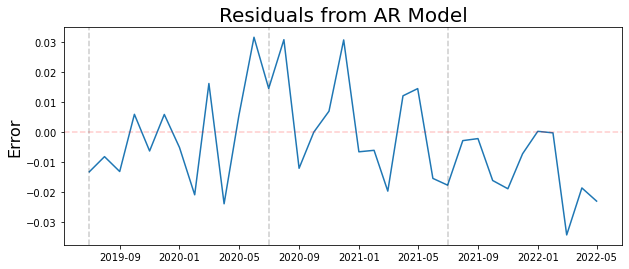

In [34]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r',linestyle='--',alpha=0.2)
for year in range(2019,2022):
    plt.axvline(pd.to_datetime(str(year)+'-07-01'), color='k', linestyle='--',alpha=0.2)

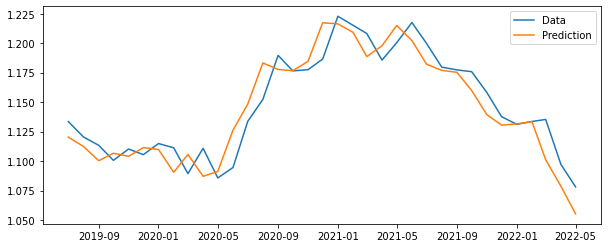

In [35]:
plt.figure(figsize=(10,4))
plt.plot(predictions_rolling)
plt.plot(test_data)
plt.legend(('Data','Prediction'))

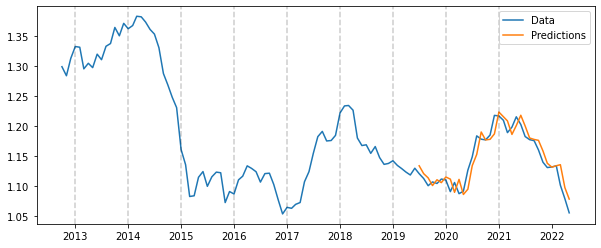

In [36]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.plot(predictions_rolling)
plt.legend(('Data','Predictions'))
for year in range(2013,2022):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--',alpha=0.2)

In [37]:
print('Mean Absolute Percent Error: ', round(np.mean(abs(residuals_rolling/test_data['close'])),4))

Mean Absolute Percent Error:  0.0117


In [38]:
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error:  0.016236514859028037


ARIMA

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model_ARIMA = ARIMA(train_data['close'], order=(1,1,1))

In [41]:
model_ARIMA_fit = model_ARIMA.fit()

In [42]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  114
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 292.360
Method:                       css-mle   S.D. of innovations              0.019
Date:                Tue, 31 May 2022   AIC                           -576.720
Time:                        09:26:27   BIC                           -565.775
Sample:                    11-01-2012   HQIC                          -572.278
                         - 04-01-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0021      0.003     -0.734      0.463      -0.008       0.003
ar.L1.D.close     0.6568      0.275      2.389      0.017       0.118       1.196
ma.L1.D.close    -0.4330      0.334     -1.297      0.195      -1.087       0.221
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5224           +0.0000j            1.5224            0.0000
MA.1            2.3097           +0.0000j            2.3097            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
pred_ARIMA = model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)

In [44]:
residuals_ARIMA = test_data['close'] - pred_ARIMA

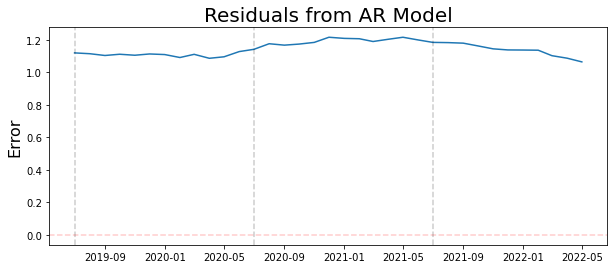

In [45]:
plt.figure(figsize=(10,4))
plt.plot(residuals_ARIMA)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r',linestyle='--',alpha=0.2)
for year in range(2019,2022):
    plt.axvline(pd.to_datetime(str(year)+'-07-01'), color='k', linestyle='--',alpha=0.2)

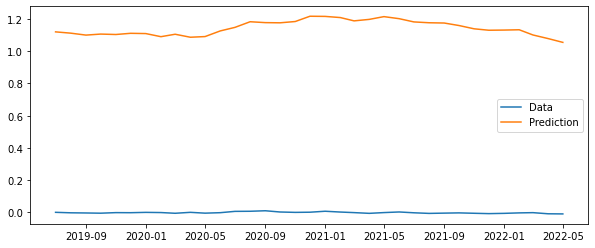

In [46]:
plt.figure(figsize=(10,4))
plt.plot(pred_ARIMA)
plt.plot(test_data)
plt.legend(('Data','Prediction'))

GARCH Model
Predict the volatility of time series in future time periods

In [47]:
import arch
from arch import arch_model

In [48]:
model_arch = arch_model(train_data,p=1,q=1)
model_fit_arch = model.fit()

In [49]:
model_fit_arch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                   81
Model:                     ARMA(1, 1)   Log Likelihood                 200.296
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 31 May 2022   AIC                           -392.592
Time:                        09:26:29   BIC                           -383.015
Sample:                    10-01-2012   HQIC                          -388.750
                         - 06-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2053      0.065     18.479      0.000       1.077       1.333
ar.L1.close     0.9699      0.023     42.671      0.000       0.925       1.014
ma.L1.close     0.1829      0.086      2.121      0.034       0.014       0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0311           +0.0000j            1.0311            0.0000
MA.1           -5.4689           +0.0000j            5.4689            0.5000
-----------------------------------------------------------------------------
"""

In [50]:
predictions_arch = model_fit_arch.forecast(horizon=len(test_data))

TypeError: forecast() got an unexpected keyword argument 'horizon'

In [ ]:
len(predictions_arch.variance.values[-1,:])

In [ ]:
len(test_data)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(list(test_data['close']))
plt.plot(np.sqrt(predictions_arch.variance.values[-1,:]))
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

Rolling Forecast

In [ ]:
rolling_predictions_arch = []
for i in range(len(test_data)):
    train = df[:-(test_size-i)]
    model_arch = arch_model(train_data['close'],p=1,q=1)
    model_fit_arch = model_arch.fit(disp='off')
    pred_arch = model_fit_arch.forecast(horizon=1)
    rolling_predictions_arch.append(np.sqrt(pred_arch.variance.values[-1,:][0]))

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(list(test_data['close']))
preds, = plt.plot(rolling_predictions_arch)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [ ]:
model_4 = arch_model(train_data, p=8,q=8)

In [ ]:
model_fit_4 = model_4.fit()

In [ ]:
model_fit_4.summary()

#GARCH Model is not working

In [ ]:
model = arch_model(train_data,p=1,q=0)

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

In [ ]:
rolling_predictions = []
test_size = len(test_data)

for i in range(test_size):
    train = df[:-(test_size-i)]
    model = arch_model(train, p=1,q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=test_data.index)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(rolling_predictions)
plt.legend(('Data','Predicted Volatility'))

Model Selection

In [53]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [54]:
df2 = df.diff().diff().dropna()
perform_adf_test(df2)

ADF Statistic: -8.490438
p-value: 0.000000


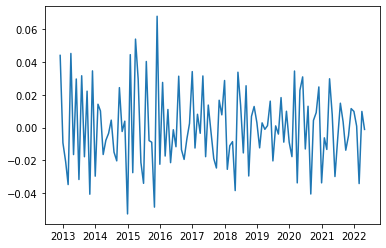

In [55]:
plt.plot(df2)

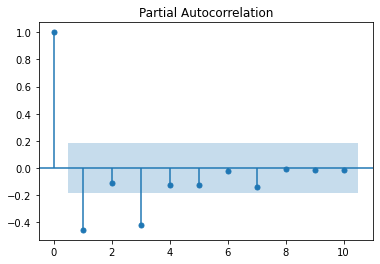

In [56]:
plot_pacf(df2, lags=10)
plt.show()

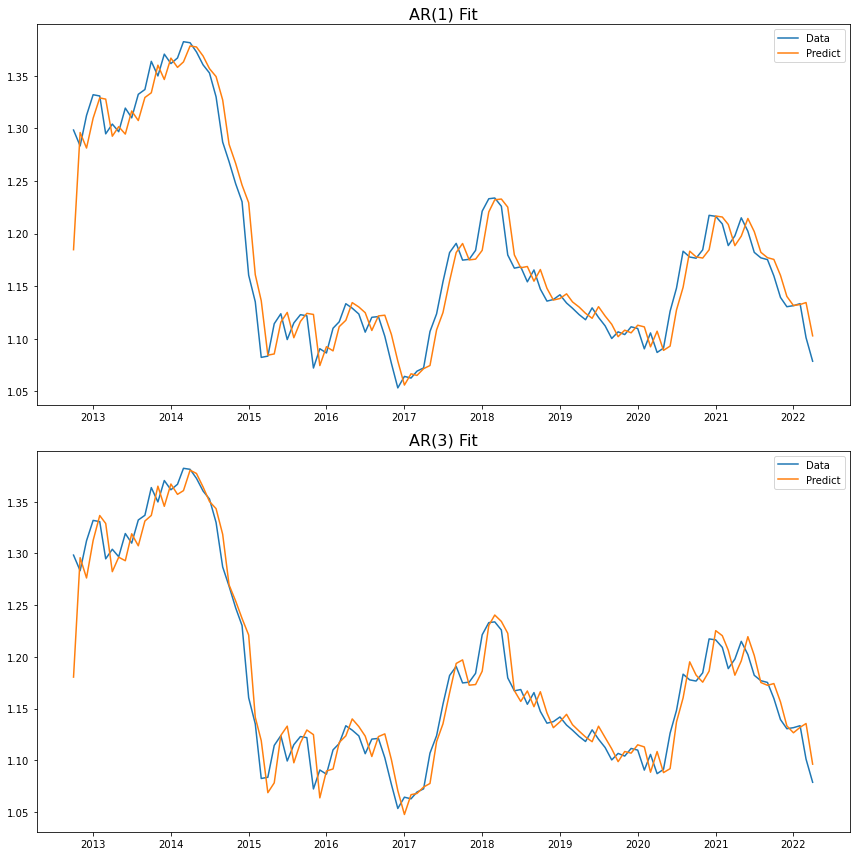

In [57]:
plt.figure(figsize=(12,12))
ar_orders = [1,3]
fitted_model_dict = {}
for idx, ar_order in enumerate(ar_orders):
    ar_model = ARMA(train_data, order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(2,1,idx+1)
    plt.plot(train_data)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit' %ar_order, fontsize=16)
    plt.legend(('Data', 'Predict'))
plt.tight_layout()

a log likelihood(l)
a number of parameters(k)
a number of samples used for fitting(n)
AIC = 2k - 2l
lower AIC via higher log likelihood or less parameters
BIC = kln(n) - 2l
lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [58]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s' %(ar_order, fitted_model_dict[ar_order].aic))
#pick the one with lowest AIC

AIC for AR(1): -570.9165936606119
AIC for AR(3): -579.1963718568034


In [59]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): -562.6817972755221
BIC for AR(3): -565.4717112149871
